<a href="https://colab.research.google.com/github/Pranathi1303/Data-analytics/blob/main/Project_2_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the diabetes dataset to a pandas DataFrame
data = pd.read_csv('/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of rows and Columns in this dataset
data.shape

(768, 9)

In [4]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing

In [5]:
data['Insulin'] = data['Insulin'].apply(lambda x: np.nan if x > 400 else x)
data['SkinThickness'] = data['SkinThickness'].apply(lambda x: np.nan if x > 96 else x)

In [6]:
data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                1
Insulin                     20
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [7]:
data['Insulin'].fillna(data['Insulin'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].mean(), inplace=True)

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Analysis

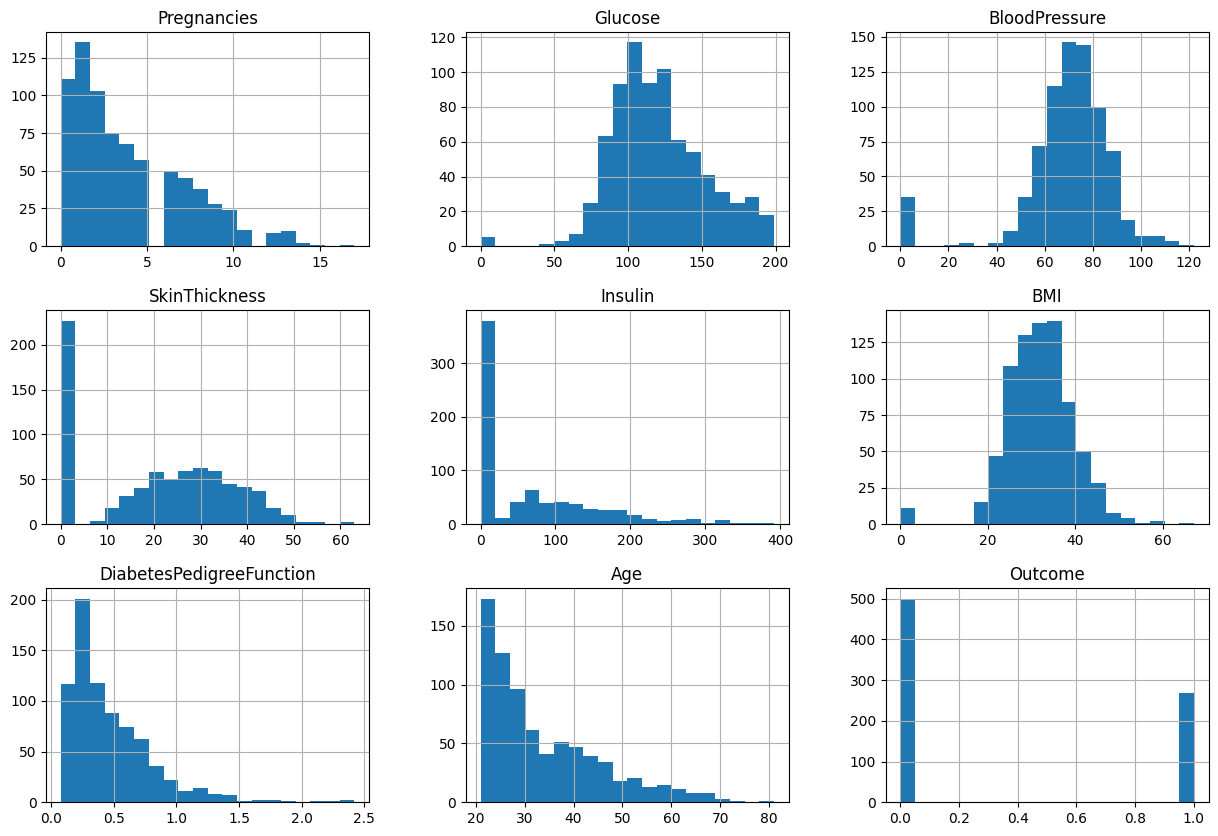

In [9]:
data.hist(bins=20, figsize=(15, 10))
plt.show()

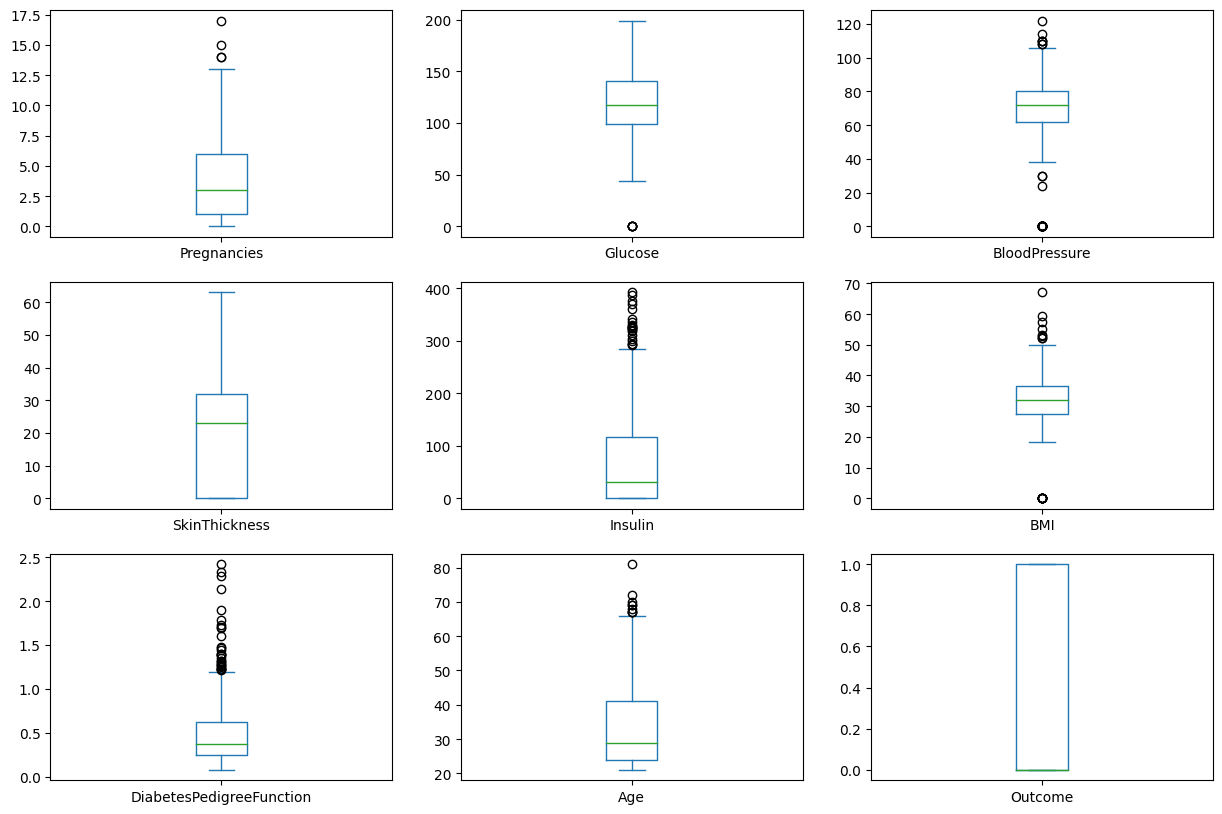

In [10]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15, 10))
plt.show()

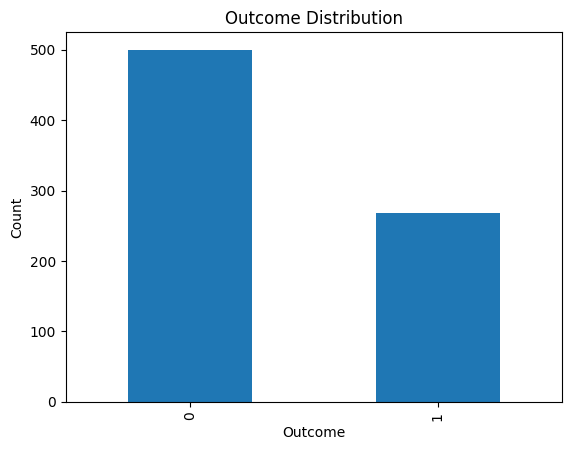

In [11]:
data['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')
plt.show()

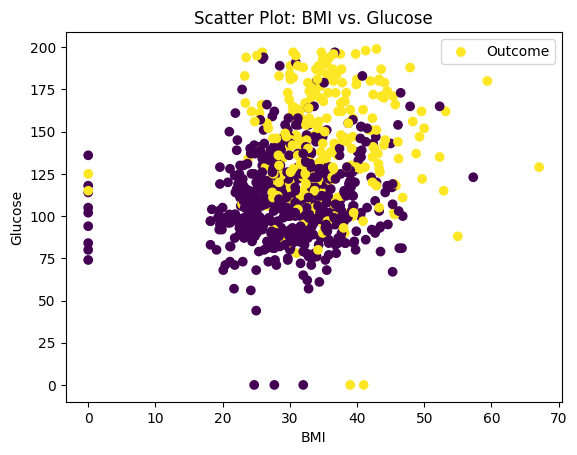

In [12]:
plt.scatter(data['BMI'], data['Glucose'], c=data['Outcome'], label='Outcome')

plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Scatter Plot: BMI vs. Glucose')
plt.legend()

plt.show()

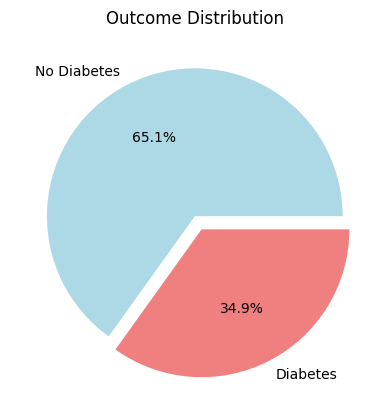

In [13]:
outcome_counts = data['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)
plt.pie(outcome_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Outcome Distribution')
plt.show()

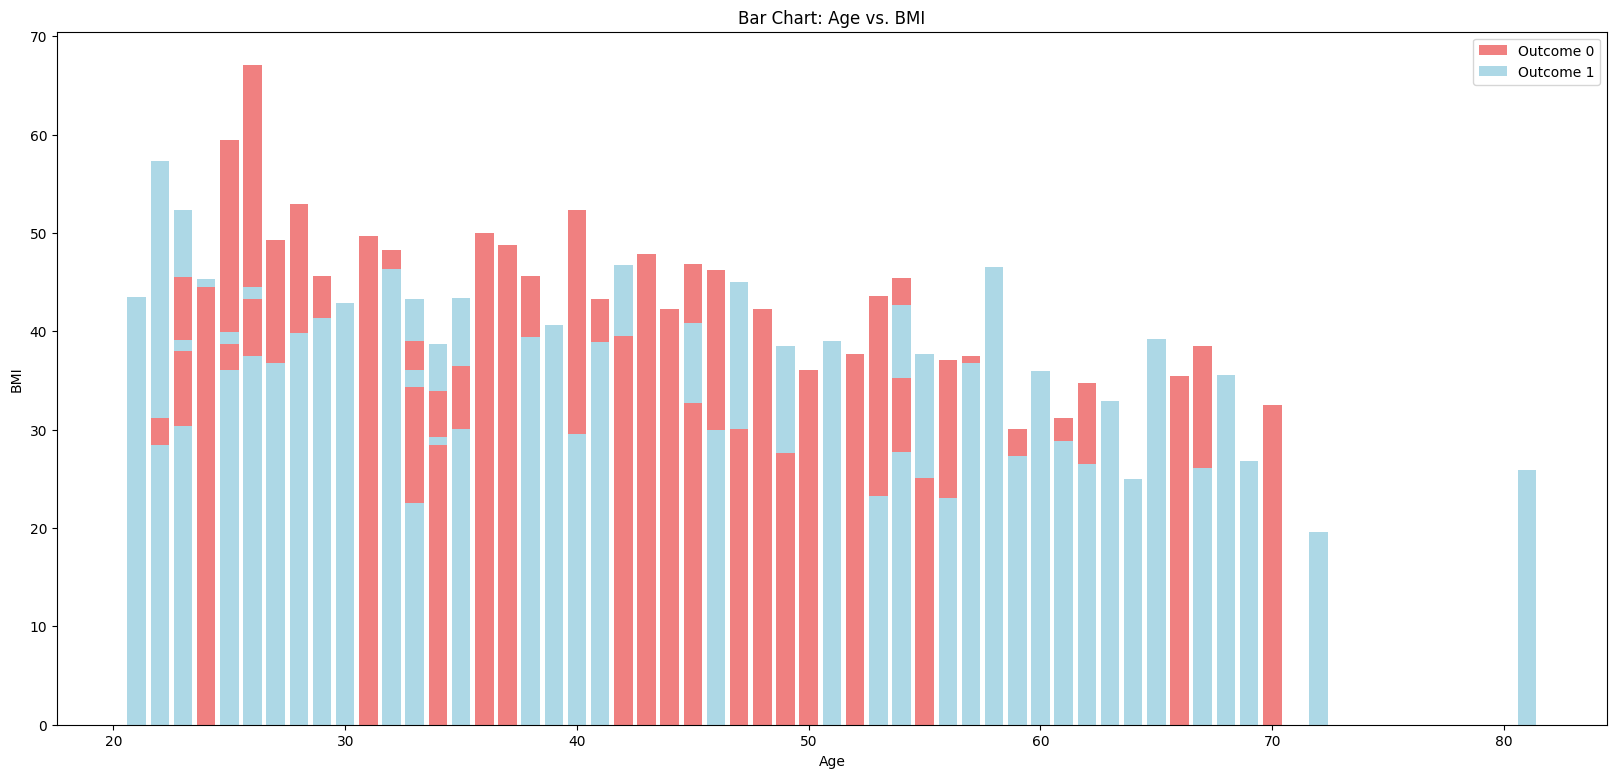

In [14]:
age = data['Age']
bmi = data['BMI']
outcomes = data['Outcome']
colors = ['lightcoral' if outcome == 1 else 'lightblue' for outcome in outcomes]
plt.figure(figsize=(20,9))
bars = plt.bar(age, bmi, color=colors)
plt.legend(handles=[bars[0], bars[-1]], labels=['Outcome 0', 'Outcome 1'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Bar Chart: Age vs. BMI')

plt.show()

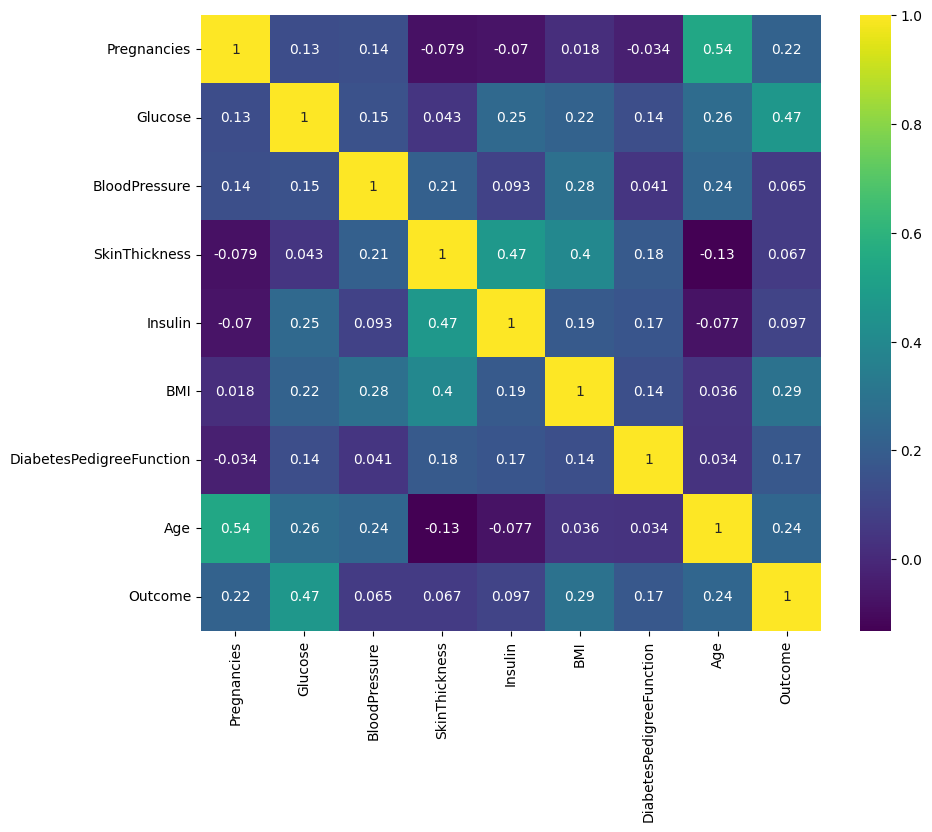

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

# Spitting the data into Training and Testing

In [16]:
from sklearn.model_selection import train_test_split
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

L1 Regularization (Lasso): Using L1 regularization can force some feature coefficients to be exactly zero, effectively removing those features.

In [17]:
#lets see if we have the features who's coefficient gets shrunk to zero
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y)

coefficients = model.coef_[0]
zero_coefficients = np.where(coefficients == 0)

zero_feature_names = X.columns[zero_coefficients]
print("Features with coefficients shrunk to zero:", zero_feature_names)

Features with coefficients shrunk to zero: Index([], dtype='object')


# UnderSampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [19]:
print(X_resampled.shape, y_resampled.shape)

(536, 8) (536,)


In [20]:
#splitting the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state=1)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375, 8) (161, 8) (375,) (161,)


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

training_accuracy = accuracy_score(y_train, y_train_pred)
training_report = classification_report(y_train, y_train_pred)
training_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Evaluating
testing_accuracy = accuracy_score(y_test, y_test_pred)
testing_report = classification_report(y_test, y_test_pred)
testing_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# metrics
print("Training Accuracy:", training_accuracy)
print("Training Classification Report:\n", training_report)
print("Training Confusion Matrix:\n", training_confusion_matrix)

print("\nTesting Accuracy:", testing_accuracy)
print("Testing Classification Report:\n", testing_report)
print("Testing Confusion Matrix:\n", testing_confusion_matrix)

Training Accuracy: 0.736
Training Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       194
           1       0.74      0.70      0.72       181

    accuracy                           0.74       375
   macro avg       0.74      0.73      0.73       375
weighted avg       0.74      0.74      0.74       375

Training Confusion Matrix:
 [[150  44]
 [ 55 126]]

Testing Accuracy: 0.7142857142857143
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70        74
           1       0.75      0.70      0.73        87

    accuracy                           0.71       161
   macro avg       0.71      0.72      0.71       161
weighted avg       0.72      0.71      0.71       161

Testing Confusion Matrix:
 [[54 20]
 [26 61]]


In [23]:
input_data = [[1,89, 66, 23.0, 94.00000, 28.1, 0.167, 21],
[1,37, 40, 35.0, 168.00000, 43.1, 2.288, 33],
[5, 116, 74, 0.0, 0.00000, 25.6, 0.201, 30],
[4,111, 72, 47.0, 207.00000, 37.1, 1.390, 56],
[3, 180, 64, 25.0, 70.00000, 34.0, 0.271, 26]]

# Initialize an empty list to store predictions
predictions = []

# Make predictions for each input sample
for sample in input_data:
    input_data_as_numpy_array = np.asarray(sample).reshape(1, -1)
    prediction = log_reg.predict(input_data_as_numpy_array)
    predictions.append(prediction[0])

# Print the predictions
for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Sample {i + 1}: The person is not diabetic")
    else:
        print(f"Sample {i + 1}: The person is diabetic")


Sample 1: The person is not diabetic
Sample 2: The person is diabetic
Sample 3: The person is not diabetic
Sample 4: The person is diabetic
Sample 5: The person is diabetic
